In [119]:
import networkx as nx
import numpy as np
import pickle
import os
from env.utils import save_dag, load_dag, to_pickle
from env.utils import *
import matplotlib.pyplot as plt


In [51]:
# Set paprameters needed
vs = [20,40,60,80,100]
alphas = [0.5, 1.0, 2.0]
seeds = list(range(20))
ccrs = [0.1,0.5,1.0, 5.0, 10.0]
betas = [0.1, 0.25, 0.5, 0.75, 1.0]
avg_comms = [500, 1000, 1500]
n_devices = [20]
device_types = [5]
device_type_probs = [0.5]
avg_speeds = [3]
avg_bws = [200]
avg_delays = [10]






def generate_data(v, alpha, seed, ccr, beta, avg_comm,
                  n_devices, device_types, device_type_prob, avg_speed, avg_bw, avg_delay,
                  network_save_path = None, program_save_path = None):

    # 1. Generate DAG
    G, widths, height = graph_dag_structure(v, alpha, seed, save_path = None)
    
    print(widths)
    print(sum(widths))

    # 2. If yes, 
    delay, comm_speed, speed, device_constraints, bw = generate_network_tmp(n_devices, 
                         device_types,
                         device_type_prob,
                         avg_speed= 3,
                         avg_bw= 200,
                         avg_delay= 10, 
                         save_path = None)

    # 3. Generate program weights
    compute, byte, op_constraints = generate_weights_for_heterogeneous_devices(G,
                            widths,
                            height,
                            alpha,
                            v,
                            ccr,
                            seed,
                            beta,
                            n_devices,
                            device_types,
                            delay, 
                            comm_speed, 
                            speed,
                            avg_comm = 1000,
                            save_path = None)
    
    # 4. Put program weights to the DAG
    for e in G.edges:
#         print(byte)
        G.edges[e]['bytes'] = byte[e]
        
    for n in G.nodes:
        G.nodes[n]['compute'] = compute[n]
                    
    network = {}
    network["delay"] = delay
    network["bw"] = bw
    network["comm_speed"] = comm_speed
    network["speed"] = speed
                    
    save_dag(program_save_path, G)
    to_pickle(network_save_path, network)
    
    return 

In [61]:
def generate_batch_data(vs, alphas, seeds, ccrs, betas, avg_comms,
                  n_devices, device_types, device_type_prob, avg_speed, avg_bw, avg_delay,
                  network_save_path = None, program_save_path = None):
    
    
    # Generate device network
    delay, comm_speed, speed, device_constraints, bw = generate_network_tmp(n_devices[0], 
                         device_types[0],
                         device_type_prob[0],
                         avg_speed= avg_speed[0],
                         avg_bw= avg_bw[0],
                         avg_delay= avg_delay[0], 
                         save_path = None)
    
    network = {}
    network["delay"] = delay
    network["bw"] = bw
    network["comm_speed"] = comm_speed
    network["speed"] = speed
    network["device_constraints"] = device_constraints
    
    network_path = "./data/device_networks"
    network_fn = "ndevice_{}_ntype_{}_speed_{}_bw_{}_delay_{}".format(n_devices[0], device_types[0], device_type_prob[0],
                                                                     avg_speed[0], avg_bw[0], avg_delay[0])
    network_final_fn = network_fn +".pkl"
    network_save_path = os.path.join(network_path, network_final_fn)
    
    to_pickle(network_save_path, network)

    for v in vs:
        for alpha in alphas:
            for seed in seeds:
                for ccr in ccrs:
                    for beta in betas:
                        for avg_comm in avg_comms:
                        
    
    
    
                            # 1. Generate DAG
                            G, widths, height = graph_dag_structure(v, alpha, seed, save_path = None)




                            # 3. Generate program weights
                            compute, byte, op_constraints = generate_weights_for_heterogeneous_devices(G,
                                                    widths,
                                                    height,
                                                    alpha,
                                                    v,
                                                    ccr,
                                                    seed,
                                                    beta,
                                                    n_devices[0],
                                                    device_types[0],
                                                    delay, 
                                                    comm_speed, 
                                                    speed,
                                                    avg_comm = avg_comm,
                                                    save_path = None)
    
                            # 4. Put program weights to the DAG
                            for e in G.edges:
                        #         print(byte)
                                G.edges[e]['bytes'] = byte[e]

                            for n in G.nodes:
                                G.nodes[n]['compute'] = compute[n]
                                G.nodes[n]['op_constraints'] = op_constraints[n]
                                
                            op_path = "./data/op_networks/" + network_fn
                            
                            if not os.path.exists(op_path):
                                os.mkdir(op_path)
                            
                            op_fn = "v_{}_alpha_{}_seed_{}_ccr_{}_beta_{}_comm_{}.pkl".format(v, alpha, seed, ccr,
                                                                                            beta, avg_comm)
                            
                            program_save_path = os.path.join(op_path, op_fn)

                            save_dag(program_save_path, G)
                            print("Saved " + program_save_path)
    
    return 

In [62]:
generate_batch_data(vs, alphas, seeds,ccrs,betas, avg_comms, n_devices,device_types, 
                    device_type_probs, avg_speeds, avg_bws, avg_delays)

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_0_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_0_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_0_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_0_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_0_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_0_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_0_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_0_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_1_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_1_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_1_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_1_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_1_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_1_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_1_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_1_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networ

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_2_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_2_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_2_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_2_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_2_ccr_0.1_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_2_ccr_0.1_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_2_ccr_0.1_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_2_ccr_0.5_beta_0.1_comm_500.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_3_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_3_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_3_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_3_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_3_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_3_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_3_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_3_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_4_ccr_0.1_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_4_ccr_0.5_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_4_ccr_0.5_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_4_ccr_0.5_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_4_ccr_0.5_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_4_ccr_0.5_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_4_ccr_0.5_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_4_ccr_0.5_beta_0.5_comm_500.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_5_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_5_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_5_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_5_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_5_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_5_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_5_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_5_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_7_ccr_0.5_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_7_ccr_0.5_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_7_ccr_0.5_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_7_ccr_0.5_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_7_ccr_0.5_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_7_ccr_0.5_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_7_ccr_1.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_7_ccr_1.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_8_ccr_0.5_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_8_ccr_0.5_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_8_ccr_0.5_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_8_ccr_0.5_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_8_ccr_0.5_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_8_ccr_0.5_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_8_ccr_0.5_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_8_ccr_0.5_beta_0.75_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_10_ccr_0.5_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_10_ccr_0.5_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_10_ccr_0.5_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_10_ccr_0.5_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_10_ccr_0.5_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_10_ccr_0.5_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_10_ccr_0.5_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_10_ccr_0.5_beta_1.0_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_11_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_11_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_11_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_11_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_11_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_11_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_11_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_11_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_n

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_12_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_12_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_13_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_13_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_13_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_13_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_13_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_13_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_14_ccr_0.5_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_14_ccr_0.5_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_14_ccr_0.5_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_14_ccr_0.5_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_14_ccr_0.5_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_14_ccr_0.5_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_14_ccr_0.5_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_14_ccr_0.5_beta_0.5_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_15_ccr_0.5_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_15_ccr_0.5_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_15_ccr_0.5_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_15_ccr_0.5_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_15_ccr_0.5_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_15_ccr_0.5_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_15_ccr_0.5_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_15_ccr_0.5_beta_1.0_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_16_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_16_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_16_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_16_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_16_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_16_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_16_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_16_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_n

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_17_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_17_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_17_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_17_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_17_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_17_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_17_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_17_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_18_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_18_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_18_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_18_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_18_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_18_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_18_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_18_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_19_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_19_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_19_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_19_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_19_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_19_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_19_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_0.5_seed_19_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_0_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_0_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_0_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_1_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_1_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_1_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_1_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_1_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networ

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_2_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_2_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_2_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_2_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_2_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_2_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_2_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_2_ccr_0.1_beta_1.0_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_3_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_3_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_3_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_3_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_3_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_3_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_3_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_3_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_3_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_3_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_3_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_3_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_3_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_3_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_4_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_4_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_ne

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_4_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_4_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_4_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_4_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_4_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_5_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_5_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_5_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_net

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_6_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_6_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_6_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_6_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_6_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_6_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_6_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_6_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networ

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_7_ccr_0.5_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_7_ccr_0.5_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_7_ccr_0.5_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_7_ccr_0.5_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_7_ccr_0.5_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_7_ccr_0.5_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_7_ccr_0.5_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_7_ccr_0.5_beta_0.5_comm_1500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_8_ccr_0.5_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_8_ccr_0.5_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_8_ccr_0.5_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_8_ccr_0.5_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_8_ccr_0.5_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_8_ccr_0.5_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_8_ccr_0.5_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_8_ccr_0.5_beta_0.5_comm_1000.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_10_ccr_0.5_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_10_ccr_0.5_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_10_ccr_0.5_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_10_ccr_0.5_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_10_ccr_0.5_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_10_ccr_0.5_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_10_ccr_0.5_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_10_ccr_0.5_beta_0.75_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_11_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_11_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_11_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_11_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_11_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_12_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_12_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_12_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./dat

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_13_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_13_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_13_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_13_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_13_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_13_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_13_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_13_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_13_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_13_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_13_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_14_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_14_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_14_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_14_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_14_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_15_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_15_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_15_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_15_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_15_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_15_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_15_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_15_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_16_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_16_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_16_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_16_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_16_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_16_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_16_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_16_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_18_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_18_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_18_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_18_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_18_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_18_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_18_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_1.0_seed_18_ccr_0.1_beta_1.0_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_0_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_0_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_0_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_0_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_0_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_0_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_0_ccr_0.1_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_0_ccr_0.1_beta_1.0_comm_1000.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_1_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_1_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_1_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_1_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_1_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_1_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_1_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_1_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_2_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_2_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_2_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_2_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_2_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_2_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_2_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_2_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_3_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_3_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_3_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_3_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_3_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_3_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_3_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_3_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_4_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_4_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_4_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_4_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_5_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_5_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_5_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_5_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_netwo

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_6_ccr_1.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_6_ccr_1.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_6_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_6_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_6_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_6_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_6_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_6_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_netwo

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_8_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_8_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_8_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_8_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_8_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_8_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_8_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_8_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_9_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_9_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_9_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_9_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_9_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_9_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_9_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_9_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_10_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_10_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_10_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_10_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_10_ccr_0.1_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_10_ccr_0.1_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_10_ccr_0.1_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_10_ccr_0.5_beta_0.1_comm_500.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_12_ccr_0.5_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_12_ccr_0.5_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_12_ccr_0.5_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_12_ccr_0.5_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_12_ccr_0.5_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_12_ccr_0.5_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_12_ccr_0.5_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_12_ccr_0.5_beta_0.5_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_13_ccr_0.5_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_13_ccr_0.5_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_13_ccr_0.5_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_13_ccr_0.5_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_13_ccr_0.5_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_13_ccr_0.5_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_13_ccr_0.5_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_13_ccr_0.5_beta_0.75_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_14_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_14_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_14_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_14_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_14_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_14_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_14_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_14_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_15_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_15_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_15_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_15_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_15_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_15_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_15_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_15_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_16_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_16_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_16_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_16_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_16_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_16_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_16_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_16_ccr_10.0_beta_0.75_comm_1000.pkl
Saved 

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_17_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_17_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_17_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_17_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_17_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_17_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_17_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_17_ccr_10.0_beta_0.75_comm_1500.pkl
Saved

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_18_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_18_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_18_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_18_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_18_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_18_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_18_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_20_alpha_2.0_seed_18_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_0_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_0_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_0_ccr_0.1_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_0_ccr_0.1_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_0_ccr_0.1_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_0_ccr_0.5_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_0_ccr_0.5_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_0_ccr_0.5_beta_0.1_comm_1500.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_1_ccr_1.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_1_ccr_1.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_1_ccr_1.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_1_ccr_1.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_1_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_1_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_1_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_1_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_2_ccr_1.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_2_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_2_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_2_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_2_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_2_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_2_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_2_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_3_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_3_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_3_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_3_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_3_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_3_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_3_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_3_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_4_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_4_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_4_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_4_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_4_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_4_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_4_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_4_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networ

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_5_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_5_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_5_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_5_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_5_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_5_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_5_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_5_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_6_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_6_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_6_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_6_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_6_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_6_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_6_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_6_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_8_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_8_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_8_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_8_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_8_ccr_0.1_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_8_ccr_0.1_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_8_ccr_0.1_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_8_ccr_0.5_beta_0.1_comm_500.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_10_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_10_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_10_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_10_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_10_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_10_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_10_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_10_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_10_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_10_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_10_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_10_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_11_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_11_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_11_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_11_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_12_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_12_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_12_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_12_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_12_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_12_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_12_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_12_ccr_10.0_beta_0.75_comm_500.pkl
Saved .

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_13_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_13_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_13_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_13_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_13_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_13_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_13_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_13_ccr_10.0_beta_0.5_comm_1500.pkl
Saved .

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_15_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_15_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_15_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_15_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_15_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_15_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_15_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_15_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_16_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_16_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_16_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_16_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_16_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_16_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_16_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_16_ccr_0.1_beta_1.0_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_17_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_17_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_17_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_17_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_17_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_17_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_17_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_17_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_18_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_18_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_18_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_18_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_18_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_18_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_18_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_0.5_seed_18_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_0_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_0_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_0_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_0_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_0_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_0_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_0_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_0_ccr_0.1_beta_1.0_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_1_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_1_ccr_0.1_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_1_ccr_0.1_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_1_ccr_0.1_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_1_ccr_0.5_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_1_ccr_0.5_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_1_ccr_0.5_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_1_ccr_0.5_beta_0.25_comm_500.pkl
Saved ./data/op_networks/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_2_ccr_1.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_2_ccr_1.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_2_ccr_1.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_2_ccr_1.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_2_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_2_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_2_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_2_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_3_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_3_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_3_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_3_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_3_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_3_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_3_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_3_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_4_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_4_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_4_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_4_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_4_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_4_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_4_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_4_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_5_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_5_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_5_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_5_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_5_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_5_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_5_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_5_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_6_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_6_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_6_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_6_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_7_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_7_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_7_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_7_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_netwo

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_8_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_8_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_8_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_8_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_8_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_8_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_8_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_8_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_9_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_9_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_9_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_9_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_9_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_9_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_9_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_9_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_10_ccr_1.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_10_ccr_1.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_10_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_10_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_10_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_10_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_10_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_10_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_11_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_11_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_11_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_11_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_11_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_11_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_11_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_11_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./d

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_12_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_12_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_12_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_12_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_12_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_12_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_12_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_12_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_13_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_13_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_13_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_13_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_13_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_13_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_13_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_13_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_14_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_14_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_14_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_14_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_14_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_14_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_14_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_14_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_15_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_15_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_15_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_15_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_15_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_15_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_15_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_15_ccr_10.0_beta_0.75_comm_500.pkl
Saved .

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_17_ccr_0.5_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_17_ccr_0.5_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_17_ccr_0.5_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_17_ccr_0.5_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_17_ccr_0.5_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_17_ccr_0.5_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_17_ccr_0.5_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_17_ccr_0.5_beta_0.75_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_18_ccr_0.5_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_18_ccr_0.5_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_18_ccr_0.5_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_18_ccr_0.5_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_18_ccr_0.5_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_18_ccr_0.5_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_18_ccr_0.5_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_18_ccr_0.5_beta_0.5_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_19_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_19_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_1.0_seed_19_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_0_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_0_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_0_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_0_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_0_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_net

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_0_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_0_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_0_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_0_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_0_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_0_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_1_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_1_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_ne

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_1_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_2_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_2_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_2_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_2_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_2_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_2_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_2_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_2_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_2_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_2_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_2_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_2_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_2_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_3_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_3_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_ne

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_3_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_3_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_3_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_4_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_4_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_4_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_4_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_4_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networ

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_4_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_4_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_4_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_4_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_4_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_5_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_5_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_5_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_net

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_6_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_6_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_6_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_6_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_6_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_6_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_6_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_6_ccr_0.1_beta_1.0_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_7_ccr_1.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_7_ccr_1.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_7_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_7_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_7_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_7_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_7_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_7_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_netwo

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_8_ccr_1.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_8_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_8_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_8_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_8_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_8_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_8_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_8_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_9_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_9_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_9_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_9_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_9_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_9_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_9_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_9_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_10_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_10_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_10_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_10_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_10_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_10_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_10_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_10_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_11_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_11_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_11_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_11_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_11_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_11_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_11_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_11_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_12_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_12_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_12_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_12_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_12_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_12_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_12_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_12_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_13_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_13_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_13_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_13_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_13_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_13_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_13_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_13_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_14_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_14_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_14_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_14_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_14_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_14_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_14_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_14_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_15_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_15_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_15_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_15_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_15_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_15_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_15_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_15_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_16_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_16_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_16_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_16_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_16_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_16_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_16_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_16_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_17_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_17_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_17_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_17_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_17_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_17_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_17_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_17_ccr_10.0_beta_0.75_comm_1500.pkl
Saved

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_18_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_18_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_18_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_18_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_18_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_18_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_18_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_18_ccr_10.0_beta_0.75_comm_1000.pkl
Saved 

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_19_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_19_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_19_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_19_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_19_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_19_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_19_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_40_alpha_2.0_seed_19_ccr_10.0_beta_0.5_comm_1500.pkl
Saved .

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_0_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_0_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_0_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_0_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_0_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_0_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_0_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_0_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_1_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_1_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_1_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_1_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_1_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_1_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_1_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_1_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_n

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_2_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_2_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_2_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_2_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_2_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_2_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_2_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_2_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_3_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_3_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_3_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_3_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_3_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_3_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_3_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_3_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_4_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_4_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_4_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_4_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_4_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_4_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_4_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_4_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_netw

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_5_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_5_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_5_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_5_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_5_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_5_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_5_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_5_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_6_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_6_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_6_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_6_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_6_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_6_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_6_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_6_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_8_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_8_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_8_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_8_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_8_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_8_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_8_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_8_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_10_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_10_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_10_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_10_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_10_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_10_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_10_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_10_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_10_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_10_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_11_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_11_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_11_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_11_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_11_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_11_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_12_ccr_0.5_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_12_ccr_0.5_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_12_ccr_0.5_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_12_ccr_1.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_12_ccr_1.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_12_ccr_1.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_12_ccr_1.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_12_ccr_1.0_beta_0.25_comm_1000.pkl
Saved ./data/op_n

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_13_ccr_0.5_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_13_ccr_0.5_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_13_ccr_0.5_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_13_ccr_0.5_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_13_ccr_0.5_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_13_ccr_0.5_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_13_ccr_1.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_13_ccr_1.0_beta_0.1_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_14_ccr_1.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_14_ccr_1.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_14_ccr_1.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_14_ccr_1.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_14_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_14_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_14_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_14_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_15_ccr_1.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_15_ccr_1.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_15_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_15_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_15_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_15_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_15_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_15_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_16_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_16_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_16_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_16_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_16_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_16_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_16_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_16_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_17_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_17_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_17_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_17_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_17_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_17_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_17_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_17_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_18_ccr_1.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_18_ccr_1.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_18_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_18_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_18_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_18_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_18_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_0.5_seed_18_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_0_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_0_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_0_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_0_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_0_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_0_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_0_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_0_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_1_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_1_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_1_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_1_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_1_ccr_0.1_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_1_ccr_0.1_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_1_ccr_0.1_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_1_ccr_0.5_beta_0.1_comm_500.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_2_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_2_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_2_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_2_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_2_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_2_ccr_0.1_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_2_ccr_0.1_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_2_ccr_0.1_beta_1.0_comm_1500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_3_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_3_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_3_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_3_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_3_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_3_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_3_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_3_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_netwo

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_4_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_4_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_4_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_4_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_4_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_4_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_4_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_4_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_netwo

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_5_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_5_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_5_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_5_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_5_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_5_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_5_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_5_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_6_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_6_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_6_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_6_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_6_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_6_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_6_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_6_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_6_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_6_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_6_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_6_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_7_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_7_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_7_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_7_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_netwo

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_8_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_8_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_8_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_8_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_8_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_8_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_8_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_8_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_8_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_8_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_9_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_9_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_9_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_9_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_9_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_9_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_netwo

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_10_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_10_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_10_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_10_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_10_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_10_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_10_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_10_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_11_ccr_0.5_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_11_ccr_0.5_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_11_ccr_0.5_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_11_ccr_0.5_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_11_ccr_0.5_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_11_ccr_0.5_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_11_ccr_1.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_11_ccr_1.0_beta_0.1_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_12_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_12_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_12_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_12_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_12_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_12_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_12_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_12_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_13_ccr_1.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_13_ccr_1.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_13_ccr_1.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_13_ccr_1.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_13_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_13_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_13_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_13_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_14_ccr_0.5_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_14_ccr_0.5_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_14_ccr_0.5_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_14_ccr_0.5_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_14_ccr_0.5_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_14_ccr_1.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_14_ccr_1.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_14_ccr_1.0_beta_0.1_comm_1500.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_15_ccr_0.5_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_15_ccr_0.5_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_15_ccr_0.5_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_15_ccr_0.5_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_15_ccr_0.5_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_15_ccr_0.5_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_15_ccr_0.5_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_15_ccr_0.5_beta_0.75_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_16_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_16_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_16_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_16_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_16_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_16_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_16_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_16_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_n

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_17_ccr_1.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_17_ccr_1.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_17_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_17_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_17_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_17_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_17_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_17_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_18_ccr_1.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_18_ccr_1.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_18_ccr_1.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_18_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_18_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_18_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_18_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_18_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_19_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_19_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_19_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_19_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_19_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_19_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_19_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_1.0_seed_19_ccr_10.0_beta_0.75_comm_1500.pkl
Saved

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_0_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_0_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_0_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_0_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_0_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_0_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_0_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_0_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_2_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_2_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_2_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_2_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_2_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_2_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_2_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_2_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_3_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_3_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_3_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_3_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_3_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_3_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_3_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_3_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_3_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_3_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_3_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_3_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_3_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_4_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_4_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_4_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_net

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_4_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_4_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_4_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_4_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_4_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_4_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_4_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_4_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_6_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_6_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_6_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_6_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_6_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_6_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_6_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_6_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networ

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_6_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_6_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_7_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_7_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_7_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_7_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_7_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_7_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_netwo

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_8_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_8_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_8_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_8_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_8_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_8_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_8_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_8_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_8_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_8_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_9_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_9_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_9_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_9_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_9_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_9_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_netwo

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_10_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_10_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_10_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_10_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_10_ccr_0.1_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_10_ccr_0.1_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_10_ccr_0.1_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_10_ccr_0.5_beta_0.1_comm_500.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_11_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_11_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_11_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_11_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_11_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_11_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_11_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_11_ccr_10.0_beta_0.75_comm_1500.pkl
Saved

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_12_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_12_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_12_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_12_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_12_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_12_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_12_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_12_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_13_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_13_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_13_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_13_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_13_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_13_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_13_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_13_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_14_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_14_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_14_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_14_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_14_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_14_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_14_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_14_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_15_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_15_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_15_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_15_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_15_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_15_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_15_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_15_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_16_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_16_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_16_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_16_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_16_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_16_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_16_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_16_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_17_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_17_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_17_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_17_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_17_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_17_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_17_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_17_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_18_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_18_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_18_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_18_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_18_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_18_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_18_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_18_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_19_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_19_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_19_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_19_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_19_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_19_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_19_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_60_alpha_2.0_seed_19_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_0_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_0_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_0_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_0_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_0_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_0_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_0_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_0_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_1_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_1_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_1_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_1_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_1_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_1_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_1_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_1_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_2_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_2_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_2_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_2_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_2_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_2_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_2_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_2_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_3_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_3_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_3_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_3_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_3_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_3_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_3_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_3_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_4_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_4_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_4_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_4_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_4_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_4_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_4_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_4_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_5_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_5_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_5_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_5_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_5_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_5_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_5_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_5_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_6_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_6_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_6_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_6_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_6_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_6_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_6_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_6_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_8_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_8_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_8_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_8_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_8_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_8_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_8_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_8_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_8_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_8_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_9_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_9_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_9_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_9_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_9_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_9_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_netwo

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_10_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_10_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_10_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_10_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_10_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_10_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_10_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_10_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_10_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_11_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_11_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_11_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_11_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_11_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_11_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_11_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_12_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_12_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_12_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_12_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_12_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_12_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_12_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_12_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_12_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_12_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_12_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_13_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_13_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_13_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_13_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_13_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_13_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_13_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_13_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_13_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_14_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_14_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_14_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_14_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_14_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_14_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_15_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_15_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_15_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_15_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_15_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_15_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_15_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_15_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_15_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_15_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_15_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_15_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_15_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_16_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./d

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_17_ccr_0.1_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_17_ccr_0.5_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_17_ccr_0.5_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_17_ccr_0.5_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_17_ccr_0.5_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_17_ccr_0.5_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_17_ccr_0.5_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_17_ccr_0.5_beta_0.5_comm_500.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_18_ccr_0.1_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_18_ccr_0.5_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_18_ccr_0.5_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_18_ccr_0.5_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_18_ccr_0.5_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_18_ccr_0.5_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_18_ccr_0.5_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_18_ccr_0.5_beta_0.5_comm_500.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_19_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_19_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_19_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_0.5_seed_19_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_0_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_0_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_0_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_0_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_n

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_0_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_0_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_0_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_0_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_1_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_1_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_1_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_1_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_netwo

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_1_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_1_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_1_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_2_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_2_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_2_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_2_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_2_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networ

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_3_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_3_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_3_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_3_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_3_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_3_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_3_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_3_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_4_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_4_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_4_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_4_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_4_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_4_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_4_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_4_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_4_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_4_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_4_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_4_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_5_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_5_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_5_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_5_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_netwo

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_6_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_6_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_6_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_6_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_6_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_6_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_6_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_6_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_6_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_6_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_6_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_6_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_6_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_6_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_7_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_7_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_ne

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_8_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_8_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_8_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_8_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_8_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_8_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_8_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_8_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_8_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_9_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_9_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_9_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_9_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_9_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_9_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_9_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_10_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_10_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_10_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_10_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_10_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_10_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_10_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_10_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_10_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_10_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_10_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_11_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_11_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_11_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_11_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_11_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_12_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_12_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_12_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_12_ccr_0.1_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_12_ccr_0.1_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_12_ccr_0.1_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_12_ccr_0.5_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_12_ccr_0.5_beta_0.1_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_13_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_13_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_13_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_13_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_13_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_13_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_13_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_13_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_13_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_13_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_13_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_13_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_14_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_14_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_14_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_14_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_14_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_14_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_14_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_14_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_14_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_14_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_15_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_15_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./da

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_15_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_15_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_15_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_15_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_15_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_15_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_15_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_15_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_17_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_17_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_17_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_17_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_17_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_17_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_17_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_17_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_17_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_18_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_18_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_18_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_18_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_18_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_18_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_18_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_18_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_18_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_18_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_18_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_18_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_18_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_19_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_19_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./da

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_19_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_19_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_19_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_19_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_19_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_19_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_19_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_1.0_seed_19_ccr_10.0_beta_1.0_comm_500.pkl
Saved .

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_0_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_0_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_0_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_0_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_0_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_0_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_0_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_0_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_1_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_1_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_1_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_1_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_1_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_1_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_1_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_1_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_netw

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_2_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_2_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_2_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_2_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_2_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_2_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_2_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_2_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_3_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_3_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_3_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_3_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_3_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_3_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_3_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_3_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_4_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_4_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_4_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_4_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_4_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_4_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_4_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_4_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_5_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_5_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_5_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_5_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_5_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_5_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_5_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_5_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_6_ccr_1.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_6_ccr_1.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_6_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_6_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_6_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_6_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_6_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_6_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_netwo

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_7_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_7_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_7_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_7_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_7_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_7_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_7_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_7_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_network

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_8_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_8_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_8_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_8_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_8_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_8_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_8_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_8_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_10_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_10_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_10_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_10_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_10_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_10_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_10_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_10_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_10_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_10_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_10_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_10_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_11_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_11_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_11_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_11_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_12_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_12_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_12_ccr_0.1_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_12_ccr_0.1_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_12_ccr_0.1_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_12_ccr_0.5_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_12_ccr_0.5_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_12_ccr_0.5_beta_0.1_comm_1500.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_13_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_13_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_13_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_13_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_13_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_13_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_13_ccr_0.1_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_13_ccr_0.1_beta_1.0_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_13_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_14_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_14_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_14_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_14_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_14_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_14_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_14_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_14_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_14_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_14_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_14_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_15_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_15_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_15_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_15_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_15_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_15_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_15_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_15_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_15_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_15_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_15_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_15_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_16_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_16_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_16_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_17_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_17_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_17_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_17_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_17_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_17_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_17_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_17_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_17_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_17_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_17_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_17_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_17_ccr_10.0_beta_1.0_comm_1500.pkl
Saved .

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_18_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_18_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_18_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_18_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_18_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_18_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_18_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_80_alpha_2.0_seed_18_ccr_10.0_beta_0.75_comm_1000.pkl
Saved 

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_0_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_0_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_0_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_0_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_0_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_0_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_0_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_0_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_0_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_1_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_1_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_1_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_1_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_1_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_1_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_1_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_1_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_1_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_1_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_1_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_1_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_1_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_1_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_1_ccr_10.0_beta_1.0_comm_1500.pkl
Saved .

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_2_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_2_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_2_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_2_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_2_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_2_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_2_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_2_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./d

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_3_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_3_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_3_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_3_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_3_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_3_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_3_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_3_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./d

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_4_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_4_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_4_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_4_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_4_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_4_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_4_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_4_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_5_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_5_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_5_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_5_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_5_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_5_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_5_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_5_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_n

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_6_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_6_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_6_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_6_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_6_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_6_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_6_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_6_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_7_ccr_1.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_7_ccr_1.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_7_ccr_1.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_7_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_7_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_7_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_7_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_7_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_8_ccr_0.5_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_8_ccr_0.5_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_8_ccr_0.5_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_8_ccr_0.5_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_8_ccr_0.5_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_8_ccr_1.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_8_ccr_1.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_8_ccr_1.0_beta_0.1_comm_1500.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_10_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_10_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_10_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_10_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_10_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_10_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_10_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_10_ccr_0.1_beta_0.75_comm_500.pkl
Saved .

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_10_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_10_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_10_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_11_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_11_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_11_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_11_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_11_ccr_0.1_beta_0.25_comm_1000.pkl
Saved 

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_12_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_12_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_12_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_12_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_12_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_12_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_12_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_12_ccr_0.1_beta_0.5_comm_1500.pkl
Saved .

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_13_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_13_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_13_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_13_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_13_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_13_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_13_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_13_ccr_0.1_beta_0.75_comm_1000.pkl
Saved 

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_13_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_13_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_14_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_14_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_14_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_14_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_14_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_14_ccr_0.1_beta_0.25_comm_1500.pkl
Saved

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_14_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_14_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_14_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_14_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_14_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_14_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_14_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_15_ccr_0.1_beta_0.1_comm_500.pkl
S

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_15_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_15_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_15_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_15_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_15_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_15_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_15_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_15_ccr_10.0_beta_1.0_comm_1000.pkl


Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_16_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_16_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_16_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_16_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_16_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_16_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_16_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_16_ccr_10.0_beta_0.5_comm_1500.pkl

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_17_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_17_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_17_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_17_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_18_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_18_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_18_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_18_ccr_0.1_beta_0.25_comm_500.pkl
Saved

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_18_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_18_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_18_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_18_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_18_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_18_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_18_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_19_ccr_0.1_beta_0.1_comm_500.pkl
S

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_19_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_19_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_0.5_seed_19_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_0_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_0_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_0_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_0_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_0_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./dat

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_0_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_0_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_0_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_0_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_0_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_0_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_0_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_0_ccr_10.0_beta_1.0_comm_500.pkl
Saved .

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_1_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_1_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_1_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_2_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_2_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_2_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_2_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_2_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_3_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_3_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_3_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_3_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_3_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_3_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_3_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_3_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_3_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_3_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_4_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_4_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_4_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_4_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_4_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_4_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_4_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_4_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_4_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_4_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_4_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_4_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_4_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_5_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./d

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_5_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_5_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_6_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_6_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_6_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_6_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_6_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_6_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_6_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_6_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_6_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_6_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_6_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_6_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_7_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_7_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./da

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_8_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_8_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_8_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_8_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_8_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_8_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_8_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_8_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_8_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_8_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_8_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_8_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_8_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_8_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_9_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_9_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./da

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_10_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_10_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_10_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_10_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_10_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_10_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_10_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_10_ccr_0.1_beta_0.5_comm_1500.pkl
Saved .

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_10_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_10_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_10_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_10_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_10_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_10_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_10_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_10_ccr_10.0_beta_1.0_comm_1500.pkl

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_11_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_11_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_12_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_12_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_12_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_12_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_12_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_12_ccr_0.1_beta_0.25_comm_1500.pkl
Saved

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_13_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_13_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_13_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_13_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_13_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_13_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_13_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_13_ccr_0.1_beta_0.75_comm_500.pkl
Saved .

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_13_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_13_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_13_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_13_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_13_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_13_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_13_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_14_ccr_0.1_beta_0.1_comm_500.pkl
S

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_14_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_14_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_14_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_14_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_14_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_14_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_14_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_14_ccr_10.0_beta_0.75_comm_500.pkl

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_15_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_15_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_15_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_15_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_15_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_15_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_15_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_15_ccr_10.0_beta_0.5_comm_500.pkl
S

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_16_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_16_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_16_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_16_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_16_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_16_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_16_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_16_ccr_10.0_beta_0.1_comm_500.pkl
Saved .

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_17_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_17_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_17_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_17_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_17_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_17_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_17_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_17_ccr_5.0_beta_1.0_comm_1500.pkl
Saved .

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_18_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_18_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_18_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_18_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_18_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_18_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_18_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_18_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_19_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_19_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_19_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_19_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_19_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_19_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_19_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_1.0_seed_19_ccr_10.0_beta_0.1_comm_1000.pkl
Saved 

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_0_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_0_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_0_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_0_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_0_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_0_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_0_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_0_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_1_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_1_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_1_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_1_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_1_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_1_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_1_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_1_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_n

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_2_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_2_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_2_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_2_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_2_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_2_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_2_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_2_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_3_ccr_1.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_3_ccr_1.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_3_ccr_1.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_3_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_3_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_3_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_3_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_3_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/o

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_4_ccr_0.5_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_4_ccr_0.5_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_4_ccr_0.5_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_4_ccr_0.5_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_4_ccr_1.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_4_ccr_1.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_4_ccr_1.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_4_ccr_1.0_beta_0.25_comm_500.pkl
Saved ./data/op_n

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_5_ccr_0.5_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_5_ccr_0.5_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_5_ccr_0.5_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_5_ccr_0.5_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_5_ccr_0.5_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_5_ccr_0.5_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_5_ccr_0.5_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_5_ccr_1.0_beta_0.1_comm_500.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_6_ccr_0.5_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_6_ccr_0.5_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_6_ccr_0.5_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_6_ccr_0.5_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_6_ccr_0.5_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_6_ccr_0.5_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_6_ccr_0.5_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_6_ccr_0.5_beta_0.75_comm_1500.pkl
Saved ./data/

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_7_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_7_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_7_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_7_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_7_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_7_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_7_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_7_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_n

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_8_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_8_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_8_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_8_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_8_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_8_ccr_1.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_8_ccr_1.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_8_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_10_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_10_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_10_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_10_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_10_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_10_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_10_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_10_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_10_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_10_ccr_10.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_10_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_10_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_11_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_11_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_11_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_11_ccr_0.1_beta_0.25_comm_500.pkl
Saved

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_12_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_12_ccr_0.1_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_12_ccr_0.1_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_12_ccr_0.1_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_12_ccr_0.1_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_12_ccr_0.1_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_12_ccr_0.1_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_12_ccr_0.1_beta_0.75_comm_1500.pkl
Saved

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_12_ccr_10.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_12_ccr_10.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_13_ccr_0.1_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_13_ccr_0.1_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_13_ccr_0.1_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_13_ccr_0.1_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_13_ccr_0.1_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_13_ccr_0.1_beta_0.25_comm_1500.pkl
Saved

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_13_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_13_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_13_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_13_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_13_ccr_10.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_13_ccr_10.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_13_ccr_10.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_13_ccr_10.0_beta_1.0_comm_500.pkl

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_14_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_14_ccr_10.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_14_ccr_10.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_14_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_14_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_14_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_14_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_14_ccr_10.0_beta_0.5_comm_500.pkl
S

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_15_ccr_5.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_15_ccr_5.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_15_ccr_5.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_15_ccr_5.0_beta_0.75_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_15_ccr_5.0_beta_1.0_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_15_ccr_5.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_15_ccr_5.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_15_ccr_10.0_beta_0.1_comm_500.pkl
Saved .

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_16_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_16_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_16_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_16_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_16_ccr_5.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_16_ccr_5.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_16_ccr_5.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_16_ccr_5.0_beta_0.5_comm_1500.pkl
Saved .

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_17_ccr_1.0_beta_1.0_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_17_ccr_1.0_beta_1.0_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_17_ccr_5.0_beta_0.1_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_17_ccr_5.0_beta_0.1_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_17_ccr_5.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_17_ccr_5.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_17_ccr_5.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_17_ccr_5.0_beta_0.25_comm_1500.pkl
Saved .

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_18_ccr_1.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_18_ccr_1.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_18_ccr_1.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_18_ccr_1.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_18_ccr_1.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_18_ccr_1.0_beta_0.75_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_18_ccr_1.0_beta_0.75_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_18_ccr_1.0_beta_0.75_comm_1500.pkl
Saved

Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_19_ccr_10.0_beta_0.1_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_19_ccr_10.0_beta_0.25_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_19_ccr_10.0_beta_0.25_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_19_ccr_10.0_beta_0.25_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_19_ccr_10.0_beta_0.5_comm_500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_19_ccr_10.0_beta_0.5_comm_1000.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_19_ccr_10.0_beta_0.5_comm_1500.pkl
Saved ./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/v_100_alpha_2.0_seed_19_ccr_10.0_beta_0.75_comm_500.pkl

In [35]:
generate_data(vs[0], alphas[0], seeds[0],ccrs[0],betas[0], avg_comms[0], n_devices[0],device_types[0], device_type_probs[0],
             avg_speeds[0], avg_bws[0], avg_delays[0])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [218]:
compute, byte, op_constraints = generate_weights_for_heterogeneous_devices(G,
                            widths,
                            height,
                            alpha,
                            v,
                            ccrs[0],
                            seed,
                            betas[0],
                            n_devices[0],
                            num_types,
                            delay, 
                            comm_speed, 
                            speed,
                            avg_comm = 1000,
                            save_path = None)

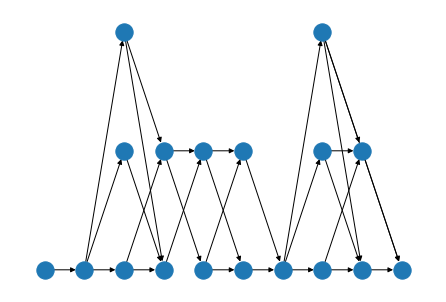

[1, 1, 3, 2, 2, 2, 1, 3, 2, 1]
10


In [217]:
num_types = 5
vs = [20,40,60,80,100]
ccrs = [0.1,0.5,1.0, 5.0, 10.0]
alphas = [0.5, 1.0, 2.0]
betas = [0.1, 0.25, 0.5, 0.75, 1.0]
n_devices = [5]
seeds = list(range(20))
G, widths, height = graph_dag_structure(vs[0], alphas[0], seed = 2, save_path = None, visualize = True)
print(widths)
print(height)

In [225]:
device_constraints

[[0, 4], [], [], [0, 1, 2], [0, 2, 4]]

In [60]:
def graph_dag_structure(v,
                      alpha,
                      seed,
                      save_path = None,
                      visualize = False):
    np.random.seed(seed)

    height_mean = np.sqrt(v) / alpha
    height = int(np.ceil(np.random.uniform(0, 2 * height_mean)))

    width_mean = alpha * np.sqrt(v)
    widths = []

    for i in range(height):
        widths.append(int(np.ceil(np.random.uniform(0, 2 * width_mean))))

    total_operator = sum(widths)

    G = nx.DiGraph()
    G.add_node(0)
    G.add_node(total_operator + 1)
    cnt = 1
    nodes = [[] for i in range(height + 2)]
    nodes[0].append(0)
    for i in range(height):
        for j in range(widths[i]):
            G.add_node(cnt)
            if i == 0:
                G.add_edge(0, cnt)
                nodes[i + 1].append(cnt)
            else:
                start_idx_last_layer = sum(widths[:i - 1]) + 1
                end_idx_last_layer = start_idx_last_layer + widths[i - 1] - 1
                nodes[i + 1].append(cnt)
                for node in range(start_idx_last_layer, end_idx_last_layer + 1):
                    p = np.random.binomial(1, 0.8)
                    if p:
                        G.add_edge(node, cnt)
            cnt += 1

    nodes[-1].append(total_operator + 1)
    end_start_idx = sum(widths[:-1])
    for i in range(widths[-1]):
        node = end_start_idx + i
        G.add_edge(node, total_operator + 1)

    # Valid checking, if any node in the middle is not connected
    # with any node in the following layer, randomly connect
    for i, layer in enumerate(nodes):
        for node in layer:
            if i != len(nodes) - 1:
                if G.out_degree(node) == 0:
                    choice = np.random.choice(nodes[i + 1])
                    G.add_edge(node, choice)

    for i, layer in enumerate(nodes):
        for node in layer:
            if i != 0:
                if G.in_degree(node) == 0:
                    choice = np.random.choice(nodes[i - 1])
                    G.add_edge(choice, node)

    if visualize:
        visualize_dag(G, widths, height)
#     if save_path:
#         graph_path = os.path.join(save_path,"dag_structure_v_{}_seed_{}_alpha_{}.pkl".format(v,seed, alpha))
#         params_path = os.path.join(save_path, "dag_params_{}_seed_{}_alpha_{}.pkl".format(v, seed,alpha))
#         params = {"widths": widths,
#                   "height": height}
#         save_dag(graph_path, G)
#         to_pickle(params_path, params)
        
    widths.insert(0, 1)
    widths.append(1)
    height += 2
    return G, widths, height

In [3]:
v = [20,40,60,80,100]
ccr = [0.1,0.5,1.0, 5.0, 10.0]
alpha = [0.5, 1.0, 2.0]
beta = [0.1, 0.25, 0.5, 0.75, 1.0]

for tv in v:
    for talpha in alpha:
        for seed in range(20):
            path = os.path.join("./data", "dag_structure_v_{}".format(tv))
            if not os.path.exists(path):
                os.makedirs(path)
            graph_dag_structure(tv, talpha, seed = seed, save_path = path)

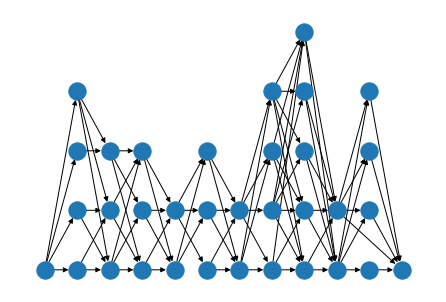

In [4]:
G = load_dag(os.path.join("./data", "dag_structure_v_20", "dag_structure_v_{}_seed_{}_alpha_{}.pkl".format(20,0,0.5)))
widths, height = load_dag_params(os.path.join("./data", "dag_structure_v_20","dag_params_{}_seed_{}_alpha_{}.pkl".format(20,0,0.5)))
visualize_dag(G,widths, height)

[4, 3, 3, 2, 3, 2, 4, 5, 2, 4]

In [52]:
def generate_weights_for_heterogeneous_devices(G,
                        widths,
                        height,
                        alpha,
                        v,
                        ccr,
                        seed,
                        beta,
                        n_devices,
                        num_types,
                        delay, 
                        comm_speed, 
                        speed,
                        avg_comm = 1000,
                        save_path = None):
    
    np.random.seed(seed)
    
    avg_delay = np.mean(delay)
    avg_comm_speed = np.mean(comm_speed)
    avg_speed = np.mean(speed)


    avg_comm = np.random.normal(loc=avg_comm, scale=avg_comm / 3)
    avg_comp = avg_comm / ccr

    # Copmutation cost for each dag node on each device
    # Structure: list[list[list]]
    comps = [[] for i in range(height)]
    
    for i in range(height):
        for j in range(widths[i]):
            node_mean = np.random.uniform(0, 2 * avg_comp)
            tmp = []
            for device in range(n_devices):
                tmp.append(np.random.uniform(node_mean*(1-beta/2), node_mean*(1+beta/2)))
            comps[i].append(tmp)
    
    # Communication cost for each dag edge
    # Structure: dict, key: edge -> cost
    comms = {}
    for edge in G.edges:
        comms[edge] = np.random.uniform(0, 2 * avg_comm)
    
    # Computational amount for each dag node.
    compute = {}
    node_counter = 0
    for i in range(height):
        for j in range(widths[i]):
            accum_compute = 0
            for k in range(n_devices):
                accum_compute += comps[i][j][k] * speed[k]
            avg_compute = accum_compute / n_devices
#             compute[i].append(avg_compute)
            compute[node_counter] = avg_compute
            node_counter += 1
# assert(compute[i][j] > 0, "Compute should be large than 0")
    
    # Communicational bytes for each dag link
    byte = {}
    for edge in G.edges:
        byte[edge] = (comms[edge] - avg_delay) / avg_comm_speed
        if byte[edge] < 0:
            byte[edge] = 1
        assert(byte[edge] > 0), "Bytes should be large than 0"
        
    op_constraints = {}
    for i, node in enumerate(G.nodes):
        op_constraints[node] = list(np.random.choice(range(num_types), 1))
        
    if save_path:
        weight_path = os.path.join(save_path, "weights_heterogeneous_v_{}_seed_{}_alpha_{}_ccr_{}_beta_{}_ndevices_{}.pkl".format(v, seed, alpha, ccr, beta,n_devices))
        res = {"comps": comps,
               "comms": comms,
               "compute": compute,
               "byte": byte, 
               "op_constraints": op_constraints}
        to_pickle(weight_path, res)
    return compute, byte, op_constraints
#     return comps, comms

In [57]:
def generate_network_tmp(n_devices, 
                     num_types = 5,
                     type_prob = 0.5,
                     avg_speed= 3,
                     avg_bw= 200,
                     avg_delay= 10, 
                     save_path = None):
        # Delay for each device
    delay = np.random.uniform(0, 2 * avg_delay, (n_devices, n_devices))
    
    for i in range(n_devices):
        for j in range(i, n_devices):
            if i == j:
                delay[i][j] = 0
            else:
                delay[i][j] = delay[j][i]
    
    
    # bw for each device
    bw = np.random.uniform(0, 2 * avg_bw, (n_devices, n_devices))
    comm_speed = 1/bw
    for i in range(n_devices):
        for j in range(i, n_devices):
            if i == j:
                comm_speed[i][j] = 0
            else:
                comm_speed[i][j] = comm_speed[j][i]
                
    # speed for each device
    speed = np.random.uniform(0, 2 * avg_speed, n_devices)
    
    device_constraints = [[] for _ in range(n_devices)]
    
    for i in range(n_devices):
        for j in range(num_types):
            rn = np.random.binomial(1,type_prob, 1)
            rn = rn[0]
            if rn > 0.5:
                device_constraints[i].append(j)
        if len(device_constraints[i]) == 0:
            device_constraints[i].append(np.random.choice(range(num_types), 1))

    
#     if save_path:
#         weight_path = os.path.join(save_path, "weights_heterogeneous_v_{}_seed_{}_alpha_{}_ccr_{}_beta_{}_ndevices_{}.pkl".format(v, seed, alpha, ccr, beta,n_devices))
#         res = {"delay": delay,
#                "comm_speed": comm_speed,
#                "speed": speed, 
#                "device_constraints": device_constraints}
#         to_pickle(weight_path, res)  
    
    return delay, comm_speed, speed, device_constraints, bw

In [70]:
tv = 20
tccr = 0.1
talpha = 0.5
tbeta = 0.1
n_device = 10
seed = 0

graph_path = os.path.join("./data", "dag_structure_v_{}".format(tv), "dag_structure_v_{}_seed_{}_alpha_{}.pkl".format(tv,seed, talpha))
params_path = os.path.join("./data", "dag_structure_v_{}".format(tv), "dag_params_{}_seed_{}_alpha_{}.pkl".format(tv, seed,talpha))
weight_path = os.path.join("./data", "weights_v_{}".format(tv), "weights_heterogeneous_v_{}_seed_{}_alpha_{}_ccr_{}_beta_{}_ndevices_{}.pkl".format(tv, seed, talpha, tccr, tbeta,n_device))


generate_weights_for_heterogeneous_devices(graph_path,
                        params_path,
                        talpha,
                        tv,
                        tccr,
                        seed,
                        tbeta,
                        n_device,
                        avg_comm = 1000,
                        avg_speed= 3,
                        avg_bw= 200,
                        avg_delay= 10,
                        save_path = None)


In [66]:
v = [20,40,60,80,100]
ccr = [0.1,0.5,1.0, 5.0, 10.0]
alpha = [0.5, 1.0, 2.0]
beta = [0.1, 0.25, 0.5, 0.75, 1.0]
n_devices = [10,20,30]

for tv in v:
    for talpha in alpha:
        for tccr in ccr:
            for tbeta in beta:
                for n_device in n_devices:
            
                    for seed in range(10):
                        graph_path = os.path.join("./data", "dag_structure_v_{}".format(tv), "dag_structure_v_{}_seed_{}_alpha_{}.pkl".format(tv,seed, talpha))
                        param_path = os.path.join("./data", "dag_structure_v_{}".format(tv), "dag_params_{}_seed_{}_alpha_{}.pkl".format(tv, seed,talpha))

                        path = os.path.join("./data", "weights_v_{}".format(tv))

                        if not os.path.exists(path):
                            os.makedirs(path)

                        generate_weights_for_heterogeneous_devices(graph_path,
                                                                   param_path,
                                                                   talpha,
                                                                   tv,
                                                                   tccr,
                                                                   seed,
                                                                   tbeta,
                                                                   n_device,
                                                                   save_path = path)
                        

In [71]:
tv = 20
tccr = 0.1
talpha = 0.5
tbeta = 0.1
n_device = 10
seed = 0

path = os.path.join("./data", "weights_v_{}".format(tv), "weights_heterogeneous_v_{}_seed_{}_alpha_{}_ccr_{}_beta_{}_ndevices_{}.pkl".format(tv, seed,talpha, tccr, tbeta,n_device))
def load_pickle(path):
    with open(path, 'rb') as handle:
        res = pickle.load(handle)
    return res

res = load_pickle(path)

In [72]:
res.keys()

dict_keys(['comps', 'comms', 'delay', 'bw', 'speed', 'compute', 'byte'])

In [82]:
v = [20,40,60,80,100]
ccr = [0.1,0.5,1.0, 5.0, 10.0]
alpha = [0.5, 1.0, 2.0]
beta = [0.1, 0.25, 0.5, 0.75, 1.0]
n_devices = [10,20,30]

# os.path.join("./data", "dag_structure_v_{}".format(tv))
# os.path.join(save_path,"dag_structure_v_{}_seed_{}_alpha_{}.pkl".format(v,seed, alpha))
# G = load_dag(os.path.join("./data", "dag_structure_v_20", "dag_structure_v_{}_seed_{}_alpha_{}.pkl".format(20,0,0.5)))
# widths, height = load_dag_params(os.path.join("./data", "dag_structure_v_20","dag_params_{}_seed_{}_alpha_{}.pkl".format(20,0,0.5)))
# graph_path = os.path.join("./data", "dag_structure_v_{}".format(tv), "dag_structure_v_{}_seed_{}_alpha_{}.pkl".format(tv,seed, talpha))
# param_path = os.path.join("./data", "dag_structure_v_{}".format(tv), "dag_params_{}_seed_{}_alpha_{}.pkl".format(tv, seed,talpha))
# "weights_heterogeneous_v_{}_seed_{}_ccr_{}_beta_{}_ndevices_{}.pkl".format(v, seed, ccr, beta,n_devices)


In [83]:
def load_training_instance_for(v, seed, alpha, ccr, beta, n_devices):
    graph_path = os.path.join("./data", "dag_structure_v_{}".format(v), "dag_structure_v_{}_seed_{}_alpha_{}.pkl".format(v,seed, alpha))
    param_path = os.path.join("./data", "dag_structure_v_{}".format(v), "dag_params_{}_seed_{}_alpha_{}.pkl".format(v, seed,alpha))
    weight_path = os.path.join("./data", "weights_v_{}".format(v), "weights_heterogeneous_v_{}_seed_{}_alpha_{}_ccr_{}_beta_{}_ndevices_{}.pkl".format(v, seed, alpha, ccr, beta,n_devices))
        
    G = load_dag(graph_path)
    widths, height = load_dag_params(param_path)
    
    weights = load_pickle(weight_path)
    delay, bw, speed, compute, byte = weights['delay'], weights['bw'], weights['speed'], weights['compute'], weights['byte']
    
    cnt = 1

    comp = weights["comps"]
    
    for i in range(height):
        for j in range(widths[i]):
            G.nodes[cnt]["compute"] = compute[i][j]
            cnt += 1
    
    total_operator = sum(widths)
    G.nodes[0]["compute"] = 0
    G.nodes[total_operator+1]["compute"] = 0
    
    for e in G.edges:
        G.edges[e]['bytes'] = byte[e]
    
    return delay, bw, speed, G
    

In [84]:
delay, bw, speed, G = load_training_instance_for(tv, seed, talpha, tccr, tbeta, n_device)

In [4]:

def load_graph_with_weights(graph_path, weight_path, params_path):
    G  = load_dag(graph_path)
    comms, comps = load_weights(weight_path)
    widths, height = load_dag_params(params_path)

    cnt = 1
    for i in range(height):
        for j in range(widths[i]):
            G.nodes[cnt]['compute'] = comps[i][j]
            cnt += 1

    for e in G.edges:
        G.edges[e]['bytes'] = comms[e]

    return G

In [87]:
def load_training_instance_for_v_ndevice(v, n_devices):
    delays = []
    bws = []
    speeds = []
    Gs = []
    
    ccr = [0.1,0.5,1.0, 5.0, 10.0]
    alpha = [0.5, 1.0, 2.0]
    beta = [0.1, 0.25, 0.5, 0.75, 1.0]
    
    for talpha in alpha:
        for tccr in ccr:
            for tbeta in beta:
                for seed in range(10):
                    delay, bw, speed, G = load_training_instance_for(v, seed, talpha, tccr, tbeta, n_devices)
                    delays.append(delay)
                    bws.append(bw)
                    speeds.append(speed)
                    Gs.append(G)
    return delays, bws, speeds, Gs
    
    
    

In [88]:
delays, bws, speeds, Gs = load_training_instance_for_v_ndevice(20, 10)

In [92]:
for delay in delays:
    print(len(delay))

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
1

In [63]:


fns = os.listdir("./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200")

In [113]:
fn = data_fn_filter("./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200")

In [115]:
len(fn)

30

In [76]:
token

['v',
 '60',
 'alpha',
 '0.5',
 'seed',
 '11',
 'ccr',
 '5.0',
 'beta',
 '0.25',
 'comm',
 '1000.pkl']

In [78]:
token[11]

'1000.pkl'

In [84]:
"60".isdigit()

True

In [122]:
op_path = "./data/op_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200/"

fns = data_fn_filter(op_path)
fn = fns[0]

G = load_dag(os.path.join(op_path, fn))

In [129]:
op_constraints = []
for n in G.nodes:
    op_constraints.append(G.nodes[n]["op_constraints"])

In [130]:
network = load_pickle("./data/device_networks/ndevice_20_ntype_5_speed_0.5_bw_3_delay_200.pkl")

In [136]:
type(np.array(4))

numpy.ndarray

In [146]:
network_constraints = network["device_constraints"]
for i,li in enumerate(network_constraints):
    for j,element in enumerate(li):
        if isinstance(element, np.ndarray):
            li[j] = element[0]
constraints = []
for op_constraint in op_constraints:
    constraints.append([])
    for i, device_constraint in enumerate(network_constraints):
        if op_constraint[0] in device_constraint:
            constraints[-1].append(i)



In [147]:
constraints

[[1, 4, 6, 8, 10, 11, 12, 13, 14, 15, 16, 18],
 [0, 1, 2, 5, 6, 8, 11, 13, 15, 17],
 [1, 4, 6, 8, 10, 11, 12, 13, 14, 15, 16, 18],
 [0, 1, 2, 5, 6, 8, 11, 13, 15, 17],
 [1, 2, 6, 7, 9, 12, 13, 14, 16, 18],
 [8, 10, 11, 13, 14, 16],
 [0, 1, 2, 3, 10, 12, 16, 17, 18, 19],
 [1, 2, 6, 7, 9, 12, 13, 14, 16, 18],
 [1, 2, 6, 7, 9, 12, 13, 14, 16, 18],
 [8, 10, 11, 13, 14, 16],
 [0, 1, 2, 3, 10, 12, 16, 17, 18, 19],
 [0, 1, 2, 5, 6, 8, 11, 13, 15, 17],
 [0, 1, 2, 5, 6, 8, 11, 13, 15, 17],
 [0, 1, 2, 3, 10, 12, 16, 17, 18, 19],
 [0, 1, 2, 5, 6, 8, 11, 13, 15, 17],
 [1, 2, 6, 7, 9, 12, 13, 14, 16, 18],
 [8, 10, 11, 13, 14, 16],
 [1, 4, 6, 8, 10, 11, 12, 13, 14, 15, 16, 18],
 [1, 4, 6, 8, 10, 11, 12, 13, 14, 15, 16, 18],
 [8, 10, 11, 13, 14, 16],
 [1, 4, 6, 8, 10, 11, 12, 13, 14, 15, 16, 18],
 [1, 4, 6, 8, 10, 11, 12, 13, 14, 15, 16, 18],
 [0, 1, 2, 3, 10, 12, 16, 17, 18, 19],
 [1, 2, 6, 7, 9, 12, 13, 14, 16, 18],
 [0, 1, 2, 3, 10, 12, 16, 17, 18, 19],
 [1, 4, 6, 8, 10, 11, 12, 13, 14, 15, 16, 18

In [141]:
network_constraints

[[2, 4],
 [0, 2, 3, 4],
 [0, 2, 4],
 [4],
 [3],
 [2],
 [0, 2, 3],
 [0],
 [1, 2, 3],
 [0],
 [1, 3, 4],
 [1, 2, 3],
 [0, 3, 4],
 [0, 1, 2, 3],
 [0, 1, 3],
 [2, 3],
 [0, 1, 3, 4],
 [2, 4],
 [0, 3, 4],
 [4]]

In [142]:
op_constraints

[[3],
 [2],
 [3],
 [2],
 [0],
 [1],
 [4],
 [0],
 [0],
 [1],
 [4],
 [2],
 [2],
 [4],
 [2],
 [0],
 [1],
 [3],
 [3],
 [1],
 [3],
 [3],
 [4],
 [0],
 [4],
 [3],
 [0],
 [3],
 [0],
 [1],
 [4],
 [2],
 [3],
 [1],
 [0],
 [0],
 [0],
 [4],
 [0],
 [3],
 [4],
 [0],
 [0],
 [3],
 [2],
 [3],
 [0],
 [3],
 [3],
 [2],
 [3],
 [2],
 [3],
 [3],
 [1],
 [0],
 [2],
 [1],
 [1],
 [4],
 [1],
 [4],
 [2],
 [0],
 [3],
 [2],
 [1],
 [2],
 [3],
 [2],
 [2],
 [0],
 [3],
 [3],
 [2],
 [2],
 [0],
 [4],
 [3],
 [4],
 [3],
 [1],
 [3],
 [1],
 [1],
 [0],
 [2],
 [3],
 [0],
 [1],
 [4],
 [2],
 [4],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [4],
 [3],
 [4],
 [2],
 [2],
 [1],
 [3],
 [3],
 [3],
 [0],
 [1],
 [4],
 [3],
 [4],
 [4],
 [3],
 [3],
 [4],
 [4],
 [3],
 [4],
 [0],
 [4],
 [3],
 [4],
 [2],
 [0],
 [1],
 [3],
 [0],
 [1],
 [2],
 [0],
 [1],
 [2],
 [3],
 [1],
 [3],
 [2],
 [2],
 [1],
 [1],
 [1],
 [1],
 [4],
 [3],
 [1],
 [4],
 [1],
 [0],
 [4],
 [0],
 [3],
 [0],
 [2],
 [0],
 [3],
 [1],
 [3],
 [4],
 [3],
 [1],
 [0],
 [4],
 [2],
 [0],
 [2],
 [1]

In [149]:
type(G.nodes[0]["compute"])

numpy.float64